In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Price.csv to Car Price.csv


In [ ]:
# preparing the same data as in ex03
import pandas as pd

CarData = pd.read_csv('Car Price.csv')

CarData['CarCompany'] = CarData['CarName'].apply(lambda x: x.split(' ')[0])

corrections = {
    'alfa-romero': 'alfa-romeo',
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

CarData.CarCompany = CarData.CarCompany.replace(corrections)

company_price = CarData.groupby('CarCompany')['price'].median().to_dict()

company_price_buckets = {}

for company, price in company_price.items():
    if price < 10000:
        company_price_buckets[company] = "low"
    elif price >= 10000 and price <= 20000:
        company_price_buckets[company] = "medium"
    else:
        company_price_buckets[company] = "high"

CarData['CarCompany'] = CarData['CarCompany'].apply(lambda x: company_price_buckets[x])

CarData = pd.get_dummies(CarData)

bool_columns = CarData.select_dtypes(include=['bool']).columns
CarData[bool_columns] = CarData[bool_columns].astype(int)

In [ ]:
# import required library
from sklearn.model_selection import train_test_split

# split data
CarData_train, CarData_test = train_test_split(CarData, test_size=0.3, random_state=100)

# shape of the train and test sets
print(CarData_train.shape)
print(CarData_test.shape)

(143, 203)
(62, 203)


In [ ]:
X_train = CarData_train.drop(['price'], axis=1)
y_train = CarData_train.price

X_test = CarData_test.drop(['price'], axis=1)
y_test = CarData_test.price

In [ ]:
# import required function for scaling
from sklearn.preprocessing import MinMaxScaler

# initialize the MinMaxScaler
scaler = MinMaxScaler()

# fix and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [ ]:
# make predictions
predicted_price = model.predict(X_test)

In [ ]:
# show predictions
predicted_price

array([ 8377.44877717,  9763.34738176,  7688.8429929 ,  9435.22372873,
        8016.59651008,  9552.43247352, 30773.27364638, 26678.68668111,
       16760.14927019, 15504.58251328, 17197.53214159, 18991.34960097,
       16391.90738222,  9325.86365615, 44633.31020579,  4042.0976036 ,
        9289.75446038, 12568.78621888, 18574.6211236 , 15503.75048919,
       15034.79470402, 15463.41404171, 35206.29103177,  5558.32931698,
       12780.36001671, 14988.99325985, 15293.60587334, 29562.58855716,
       17121.40915608, 11998.46115193,  6749.07335575, 30366.0794473 ,
       19769.02815178, 25943.00596191, 11868.3631608 , 13743.94087986,
       20444.67599314, 12313.24569955,  7522.35168499, 11252.20635597,
       39386.30025891, 13547.92969354,  5431.3538524 , 12827.39998127,
        7622.22164463, 13717.85957955,  7638.09905965, 11412.20926804,
       10583.92490356, 12911.40541749,  7554.73894893, 11632.82333631,
        7769.50150832, 15053.6296749 , 14072.94029662,  9054.90573531,
      

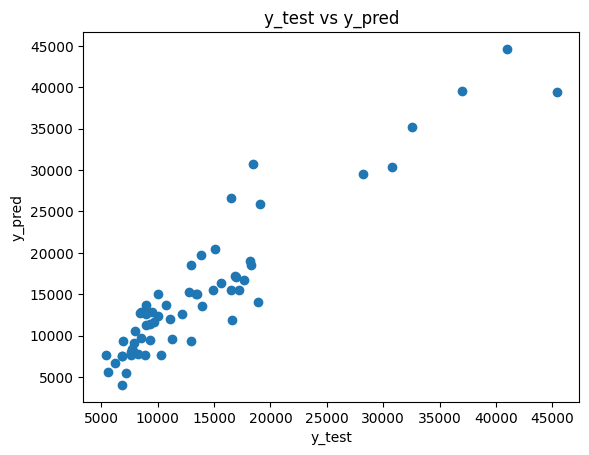

In [ ]:
# plotting y_test and y_pred to understand the spread
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_price)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, predicted_price)

0.8287879514616658